Title: Financial Crisis in Africa

Date Started: 10/15/2025

Objective: 

* What factors are most associated with the banking crisis in African Countries?
* Given past crises in each country, can we forecast the likelihood of a crisis within the next decade? (Predicative Analysis)


## About this file
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

It specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

In [2]:
# Importing of libraries for exploration:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Loding in the data
raw_df = pd.read_csv('african_crises.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [8]:
raw_df.shape  # Gives the row and columns
raw_df.dtypes  # Gives the data type of each feature (column)


case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object

# Data Dictionary:

* banking_crisis (Target): {0 = no_crisis, 1 = crisis}
* systemic_crisis : {0 = no , 1 = yes}

## Exploratory Data Analysis

Key Notes:

* When exploring data that we would need to encode our binary target ahead of time. Since functions like corr will only work with numericals.   

In [11]:
# Find whether there are missing values within the data.
raw_df.isna().sum()  # This will count the amount of data that have NA in each feature. 

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [ ]:
# Checking Class Imbalance
freq_count = raw_df['banking_crisis'].value_counts(normalize=True) # Normalize=True gives frequency
raw_count = raw_df['banking_crisis'].value_counts(normalize=False) # Normalize=Fale give count

print(f'     Frequency Count:\n'
      f'{freq_count}')
print(f'    Raw Count:\n'
      f'{raw_count}')

     Frequency Count:
banking_crisis
no_crisis    0.911237
crisis       0.088763
Name: proportion, dtype: float64
    Raw Count:
banking_crisis
no_crisis    965
crisis        94
Name: count, dtype: int64


In [26]:
# Target is a Binary Logistic Regression.
# Will need to map it manually instead of using OneHotEncoder.
# OneHotEncoder is only for multinomial logistic regression (multi-class)

target_data = raw_df['banking_crisis'].map({'no_crisis':0,'crisis':1})

In [31]:
# Concate the target data putting it back into the original data
cleanup_data = raw_df.drop(['banking_crisis'], axis=1) # remove the redundant banking crisis feature
clean_df = pd.concat([cleanup_data, target_data], axis=1)
clean_df.head(15)


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,0
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,0
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,0
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,0
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,0


In [32]:
# Create a heat map to correlate between all coef
corr_df = clean_df[['case',
                  'year',
                  'systemic_crisis',
                  'exch_usd',
                  'domestic_debt_in_default',
                  'sovereign_external_debt_default',
                  'gdp_weighted_default',
                  'inflation_annual_cpi',
                  'independence',
                  'currency_crises',
                  'inflation_crises',
                  'banking_crisis']]

<Axes: >

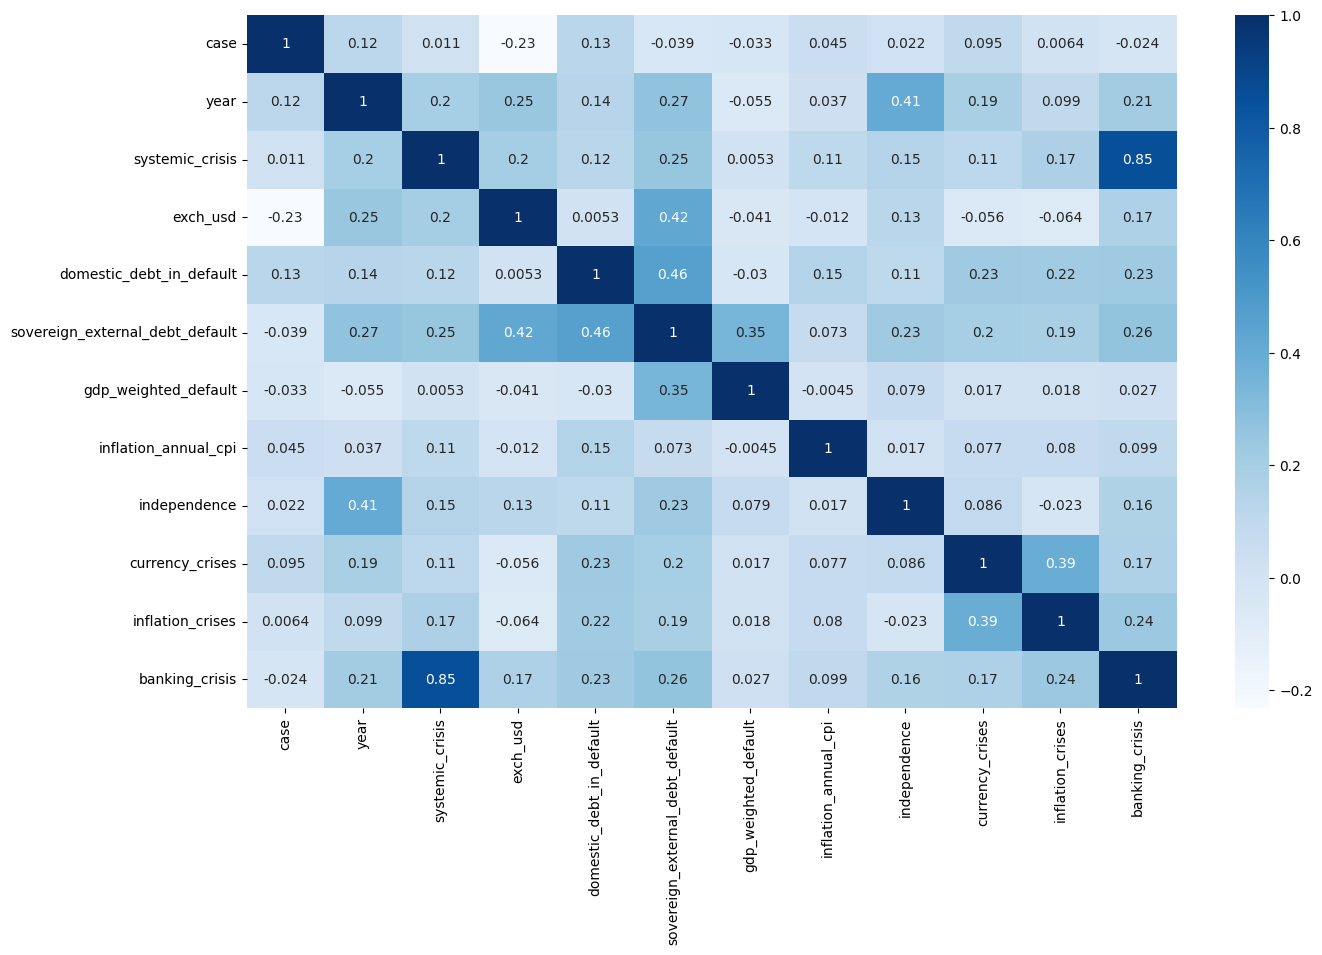

In [36]:
plt.figure(figsize=(15,9))
sns.heatmap(corr_df.corr(), annot=True, cmap='Blues', cbar=True)

In [37]:
# Compute a cross tabulation between the effects of 
pd.crosstab(clean_df['banking_crisis'], clean_df['systemic_crisis'], normalize='index')

systemic_crisis,0,1
banking_crisis,,
0,0.993782,0.006218
1,0.191489,0.808511
